find half-peak latency of the LPP in each condition
 use jackknife leave one out method

In [1]:
import my_jackknife_latency as mjack
import mne
from mne.channels import find_ch_connectivity, make_1020_channel_selections
from mne.stats import spatio_temporal_cluster_test

from config import (fname,
                    subject_ids, 
                    sessions, 
                    subj_interv, 
                    subj_control, 
                     all_evokeds_interv_1, 
                     all_evokeds_interv_2, 
                     all_evokeds_control_1, 
                     all_evokeds_control_2)
                     
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import pingouin as pg
import seaborn as sns

import matplotlib.pyplot as plt

/home/claire/.local/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.4, the latest is 0.3.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


Read the individual evoked data and group by condition in lists

In [2]:
for subj in subject_ids:
    for sess in sessions:
        evokeds= mne.read_evokeds(fname.evoked_pv(subject='sub-'+ str(subj), 
                                                  session='ses-'+str(sess)), 
                                    baseline=(None, 0))


        for idx, evoked in enumerate(evokeds):
            evoked.apply_baseline((None, 0))

            if subj in subj_interv:
                if sess == 1:
                    assert len(evokeds) == len(all_evokeds_interv_1)
                    all_evokeds_interv_1[idx].append(evoked)
                    
                elif sess==2:
                    assert len(evokeds) == len(all_evokeds_interv_2)
                    all_evokeds_interv_2[idx].append(evoked)
                
            elif subj in subj_control:
    
                if sess == 1:
                    assert len(evokeds) == len(all_evokeds_control_1)
                    all_evokeds_control_1[idx].append(evoked)
                
                elif sess==2:
                    assert len(evokeds) == len(all_evokeds_control_2)
                    all_evokeds_control_2[idx].append(evoked)

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-146/ses-1/eeg//sub-146_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode:

    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 32 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 33 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-172/ses-2/eeg//sub-172_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    

        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 78 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 39 - aspect type = 100
No projector specified for this dataset. Please

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 39 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-276/ses-1/eeg//sub-276_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of int

        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type =

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-330/ses-2/eeg//sub-330_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 72 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 35 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 36 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-428/ses-1/eeg//sub-428_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 78 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 74 - aspect typ

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//p

    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
       

        nave = 37 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 35 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-562/ses-1/eeg//sub-562_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 81 - aspect type = 100
No projector specified for th

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
     

        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-594/ses-2/eeg//sub-594_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 75 - aspect

No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
A

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-690/ses-1/eeg//sub-690_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms

        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 38 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 37 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: me

Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-726/ses-2/eeg//sub-726_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 69 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 68 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 74 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode:

    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-750/ses-1/eeg//sub-750_ses-1_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    

        0 CTF compensation matrices available
        nave = 73 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neut)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw-neut)
        0 CTF compensation matrices available
        nave = 37 - aspect type = 100
No projector specified for this dataset. Please

Applying baseline correction (mode: mean)
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (neg-neut)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Reading /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/derivatives//passive_viewing/sub-786/ses-2/eeg//sub-786_ses-2_pv_ave.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1000.00 ms (hw)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Applying baseline correction (mode: mean)
    Found the data of int

Get only erps corresponding to lpp (previously computed in 05-Evoked-PV)

In [3]:
# lpp to health warning pictures
all_lpp_hw=[all_evokeds_control_1[3], all_evokeds_control_2[3], 
            all_evokeds_interv_1[3], all_evokeds_interv_2[3]]

# lpp to negative stimuli
all_lpp_neg=[all_evokeds_control_1[4], all_evokeds_control_2[4], 
             all_evokeds_interv_1[4], all_evokeds_interv_2[4]]


Set up variables for LPP definition

In [5]:
elecs= ['Pz']#, 'P3', 'P4']#, 'P3', 'P4']  # electrodes on which we compute the lpp
   
tmin, tmax = 0.25, 1.0 #time window in which to look for ERP peak
peak_frac=0.5 # fractional latency peak -> percentage of amplitude of the ERP peak 
#we are looking for to define the ERP onset 
 

Find LPP peak for both Health warnings and Negative pictures
------------------------------------------------------------------------------------------

1. compute successive group average ERP using leave one out

In [6]:

gd_erp_lpp_hw= mjack.get_average_erp_leave_one_out(all_lpp_hw, len(all_lpp_hw), elecs)  


gd_erp_lpp_neg= mjack.get_average_erp_leave_one_out(all_lpp_neg, len(all_lpp_neg), elecs)  
 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([0]))
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (m

[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 

[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([7]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17,
       18, 19, 20, 21]), array([14]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), array([21]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean

[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 

[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10,

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17,
       18, 19, 20, 21]), array([16]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([1]))
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 

[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([8]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19, 20, 21]), array([15]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Identifying common channels ...
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,

       18, 19, 20, 21]), array([3]))
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([10]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18, 19, 20, 21]), array([17]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([2]))
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 

[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([9]))
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21]), array([19]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 1  2  3  4  5  6  7  8  9 10 11 12 

[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([4]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  8  9 10 11 12 

[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([11]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 19, 20, 21]), array([18]))
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  3  4  5  6  7  8  9 10 11 12 

[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([6]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8 10 11 12 

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17,
       18, 19, 20, 21]), array([13]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21]), array([20]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21]
Applying baseline correction (mode: mean

[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  2  3  4  5  6  7  8  9 10 11 12 

[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]), array([5]))
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)

[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  9 10 11 12 

[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21]
Identifying common channels ...
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21]
Applying baseline correction (mode: mean)
[ 0  1  2  3  4  5  6  7  8  9 10 11 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Identifying common channels ...


2. find fractional peak latency for each of the leave-one-out groups

In [8]:

lpp_peak_onset_hw = mjack.get_frac_peak_latency(gd_erp_lpp_hw, n_group= len(all_lpp_hw), tmin=tmin, tmax=tmax, peak_frac=peak_frac, sfreq=250)


lpp_peak_onset_neg = mjack.get_frac_peak_latency(gd_erp_lpp_neg, n_group= len(all_lpp_neg), tmin=tmin, tmax=tmax, peak_frac=peak_frac, sfreq=250)
    

[0.44679178]
[0.39471537]
[0.41271441]
[0.399553]
[0.36246675]
[0.38035875]
[0.38398921]
[0.37901365]
[0.397123]
[0.42199027]
[0.43226352]
[0.39924376]
[0.41458706]
[0.40076655]
[0.4059943]
[0.38052763]
[0.41346623]
[0.41461754]
[0.39705942]
[0.40588156]
[0.39547483]
[0.38228087]
[0.49733261]
[0.53794397]
[0.51182014]
[0.49033762]
[0.51752326]
[0.5160044]
[0.49501689]
[0.50917632]
[0.51467822]
[0.54127955]
[0.52001352]
[0.50609248]
[0.54052497]
[0.52735005]
[0.50266666]
[0.50544672]
[0.53104894]
[0.5321641]
[0.505991]
[0.49553066]
[0.52325873]
[0.49794842]
[0.43070714]
[0.47182886]
[0.43909619]
[0.43627577]
[0.47560227]
[0.4272227]
[0.46366444]
[0.47953814]
[0.45572141]
[0.42258237]
[0.45252116]
[0.48072385]
[0.44567801]
[0.45260175]
[0.44769981]
[0.4698219]
[0.46361138]
[0.46240763]
[0.48117402]
[0.45406747]
[0.4554227]
[0.46895039]
[0.36097351]
[0.3663197]
[0.35685963]
[0.34710866]
[0.34970099]
[0.36044222]
[0.41756786]
[0.37381138]
[0.37442731]
[0.36346956]
[0.37996626]
[0.3504283]


Test for Onset difference between groups and sessions


In [16]:
d_hw={'CTR1': lpp_peak_onset_hw[0], 'CTR2':lpp_peak_onset_hw[1],
   'INT1':lpp_peak_onset_hw[2], 'INT2':lpp_peak_onset_hw[3]}

df_hw=pd.concat([pd.Series(v, name=k) for k, v in d_hw.items()], axis=1)
df_hw['id']=df_hw.index
df_hw_long=pd.wide_to_long(df_hw, ["CTR", "INT"], i='id', j="Time")
df_hw_long= pd.melt(df_hw_long.reset_index(), id_vars=['id', 'Time'], 
                 value_vars=['CTR', 'INT'], 
                 var_name='Groupe', 
                 value_name='Latency')

Test for normality of data distribution

In [17]:
pg.normality(df_hw_long, group='Groupe', dv='Latency')

,W,pval,normal
CTR,0.860552,0.000082,False
INT,0.893049,0.000670,False


LPP for Health warning
----------------------------------

Use non-parametric wilcoxon signed rank test

In [25]:
# CTR T1 vs CTR T2
ctr_pre_post=pg.wilcoxon(df_hw['CTR1'],df_hw['CTR2'])

# CTR T1 vs INT T1
ctr_int_pre=pg.wilcoxon(df_hw['CTR1'],df_hw['INT1'])

 # CTR T2 vs INT T2
ctr_int_post=pg.wilcoxon(df_hw['CTR2'],df_hw['INT2']) 

# INT T1 vs INT T2
int_pre_post=pg.wilcoxon(df_hw['INT1'],df_hw['INT2'])

# correct for multiple comparisons
  
p_vals_all=[ctr_int_post['p-val'][0],ctr_int_pre['p-val'][0],
            ctr_int_post['p-val'][0],int_pre_post['p-val'][0] ] 

reject, pvals_corr = pg.multicomp(p_vals_all, method='bonf')
print('P values after correction for multiple comparisons', reject, pvals_corr)

P values after correction for multiple comparisons [ True  True  True  True] [0.00017205 0.00022719 0.00017205 0.00017205]


We have pvals<0.05 for each comparison.
Now let's plot this.


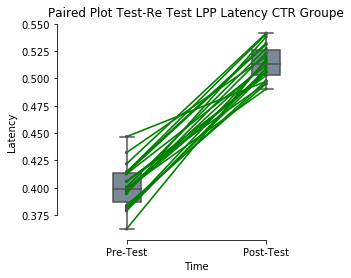

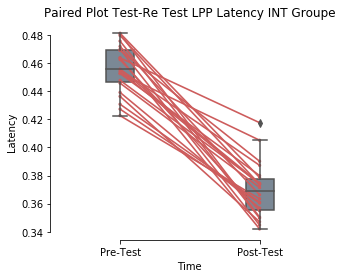

In [99]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 4)) 
fig1, ax1 = plt.subplots(1, 1, figsize=(5, 4)) 

df_ctr=df_hw_long.query("Groupe == 'CTR'")
ctr_plot=pg.plot_paired(data=df_ctr, dv='Latency', within='Time', subject= 'id', ax=ax1)
 
plt.title('Paired Plot Test-Re Test LPP Latency CTR Groupe')
plt.xticks(ticks=[0, 1], labels=['Pre-Test', 'Post-Test'])

fig2, ax2 = plt.subplots(1, 1, figsize=(5, 4)) 

df_int=df_hw_long.query("Groupe == 'INT'")
int_plot = pg.plot_paired(data=df_int, dv='Latency', within='Time', subject= 'id', ax=ax2)

plt.title('Paired Plot Test-Re Test LPP Latency INT Groupe')
plt.xticks(ticks=[0, 1], labels=['Pre-Test', 'Post-Test'])

fig1.savefig(fname.figures_pv + '/lpp_hw_ctr_latency.png')
fig2.savefig(fname.figures_pv + '/lpp_hw_int_latency.png')


In [96]:
print(f"Mean peak latencies: \n CTR T1: {np.mean(df_hw['CTR1'])}")
print(f" \n CTR T2: {np.mean(df_hw['CTR2'])}")
print(f" \n INT T1: {np.mean(df_hw['INT1'])}")
print(f" \n INT T2: {np.mean(df_hw['INT2'])}")

Mean peak latencies: 
 CTR T1: 0.40094906685846043
 
 CTR T2: 0.5145067831703858
 
 INT T1: 0.45622360672352613
 
 INT T2: 0.36926077808070484


LPP for negative pictures
------------------------------------

In [51]:
d_neg={'CTR1': lpp_peak_onset_neg[0], 'CTR2':lpp_peak_onset_neg[1],
   'INT1':lpp_peak_onset_neg[2], 'INT2':lpp_peak_onset_neg[3]}

df_neg=pd.concat([pd.Series(v, name=k) for k, v in d_neg.items()], axis=1)
df_neg['id']=df_neg.index
df_neg_long=pd.wide_to_long(df_neg, ["CTR", "INT"], i='id', j="Time")
df_neg_long= pd.melt(df_neg_long.reset_index(), id_vars=['id', 'Time'], 
                 value_vars=['CTR', 'INT'], 
                 var_name='Groupe', 
                 value_name='Latency')

In [52]:
pg.normality(df_neg_long, group='Groupe', dv='Latency')

,W,pval,normal
CTR,0.833253,1.682574e-05,False
INT,0.758411,4.070666e-07,False


In [53]:
# CTR T1 vs CTR T2
ctr_pre_post_neg=pg.wilcoxon(df_neg['CTR1'],df_neg['CTR2'])

# CTR T1 vs INT T1
ctr_int_pre_neg=pg.wilcoxon(df_neg['CTR1'],df_neg['INT1'])

 # CTR T2 vs INT T2
ctr_int_post_neg=pg.wilcoxon(df_neg['CTR2'],df_neg['INT2']) 

# INT T1 vs INT T2
int_pre_post_neg=pg.wilcoxon(df_neg['INT1'],df_neg['INT2'])

# correct for multiple comparisons
  
p_vals_all_neg=[ctr_int_post_neg['p-val'][0],ctr_int_pre_neg['p-val'][0],
            ctr_int_post_neg['p-val'][0],int_pre_post_neg['p-val'][0] ] 

reject_neg, pvals_corr_neg = pg.multicomp(p_vals_all_neg, method='bonf')
print('P values after correction for multiple comparisons', reject_neg, pvals_corr_neg)

P values after correction for multiple comparisons [False False False  True] [0.61260508 0.57611198 0.61260508 0.00066349]


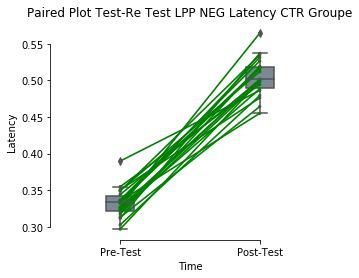

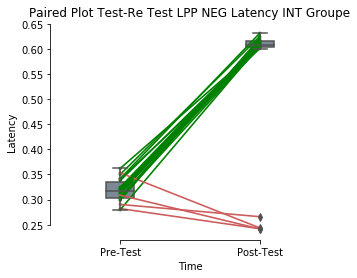

In [100]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 4)) 
fig1, ax1 = plt.subplots(1, 1, figsize=(5, 4)) 

df_ctr_neg=df_neg_long.query("Groupe == 'CTR'")
ctr_plot=pg.plot_paired(data=df_ctr_neg, dv='Latency', within='Time', subject= 'id', ax=ax1)
 
plt.title('Paired Plot Test-Re Test LPP NEG Latency CTR Groupe')
plt.xticks(ticks=[0, 1], labels=['Pre-Test', 'Post-Test'])

fig2, ax2 = plt.subplots(1, 1, figsize=(5, 4)) 

df_int_neg=df_neg_long.query("Groupe == 'INT'")
int_plot = pg.plot_paired(data=df_int_neg, dv='Latency', within='Time', subject= 'id', ax=ax2)

plt.title('Paired Plot Test-Re Test LPP NEG Latency INT Groupe')
plt.xticks(ticks=[0, 1], labels=['Pre-Test', 'Post-Test'])


fig1.savefig(fname.figures_pv + '/lpp_neg_ctr_latency.png')
fig2.savefig(fname.figures_pv + '/lpp_neg_int_latency.png')


In [97]:
print(f"Mean peak latencies: \n CTR T1: {np.mean(df_neg['CTR1'])}")
print(f" \n CTR T2: {np.mean(df_neg['CTR2'])}")
print(f" \n INT T1: {np.mean(df_neg['INT1'])}")
print(f" \n INT T2: {np.mean(df_neg['INT2'])}")

Mean peak latencies: 
 CTR T1: 0.3322495977504156
 
 CTR T2: 0.5055092546841574
 
 INT T1: 0.3182224982117426
 
 INT T2: 0.5455184448633452


Compare NEG to HW onsets in groups

In [80]:
pg.wilcoxon(df_neg['INT1'],df_hw['INT1'])


,W-val,tail,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.000043,-1.0,1.0
